In [1]:
import numpy as np
import pandas as pd
import xml.etree.cElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import Nominatim
import os

%matplotlib inline

In [2]:
file = { "Comments":"Comments.xml","Users":"Users.xml","Votes":"Votes.xml","Tags":"Tags.xml",
                    "History":"PostHistory.xml","Links":"PostLinks.xml","Posts":"Posts.xml","Badges":"Badges.xml"}

ai_path = "Stack/ai.stackexchange.com/"

In [23]:
def posts_data(path):
    posts_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('CreationDate', '').split('T')[0]
            time_str = element.get('CreationDate', '').split('T')[1]
            post_type_id = element.get('PostTypeId','')
            parent_id = element.get('ParentId','-')
            accepted_answer_id = element.get('AcceptedAnswerId','-')
            view_count = element.get('ViewCount', '0')
            owner_id = element.get('OwnerUserId','-')
            title = element.get('Title','Answer')
            tags = element.get('Tags','-').replace("<","").replace(">"," ").rstrip().replace(" ",',')
            body = element.get('Body','')
            answer_count = element.get('AnswerCount','0')
            comment_count = element.get('CommentCount','-')
            favor_count = element.get('FavoriteCount','-')
        
            posts_mem.append([id_count,post_type_id,accepted_answer_id,parent_id,
                              date_str,time_str,owner_id, view_count,title,tags,
                              body,answer_count,comment_count, favor_count])
    
    posts = pd.DataFrame(posts_mem, columns=['Id','Post_Type','Accepted_Answer_Id','Parent_Id',
                                             'Creation_Date','Creation_Time','Owner_Id','View_Count','Title',
                                             'Tags','Body','Answer_Count','Comment_Count','Favorite_Count'])
    posts_mem = []
    return posts

In [4]:
def badges_data(path):
    badges_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('Date', '').split('T')[0]
            time_str = element.get('Date', '').split('T')[1]
            user_id = element.get('UserId','')
            badge_name = element.get('Name','-')
            badges_mem.append([id_count,date_str, time_str,user_id, badge_name])
    
    badges = pd.DataFrame(badges_mem, columns=['Id','Date','Time','User_Id','Badge_Name'])
    
    badges_mem = []
    return badges

In [5]:
def comments_data(path):
    comments_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('CreationDate', '-').split('T')[0]
            time_str = element.get('CreationDate', '-').split('T')[0]
            post_id = element.get('PostId','-')
            user_id = element.get('UserId','-')
            score = element.get('Score','0')
            text = element.get('Text','-')
            comments_mem.append([id_count,date_str, post_id, user_id, score,text])
    
    comments = pd.DataFrame(comments_mem, columns=['Id','Creation_Date','Post_Id','User_Id','Score','Text'])
    
    comments_mem = []
    return comments

In [6]:
def post_links(path):
    post_links_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('CreationDate', '-').split('T')[0]
            time_str = element.get('CreationDate','-').split('T')[1]
            post_id = element.get('PostId','-')
            related_post_id = element.get('RelatedPostId','-')
            post_links_mem.append([id_count,date_str, time_str, post_id, related_post_id])
    
    post_links = pd.DataFrame(post_links_mem, columns=['Id','Creation_Date','Creation_Time',
                                                   'Post_Id','Related_Post_Id'])
    
    post_links_mem = []
    return post_links

In [7]:
def post_history(path):
    post_history_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('CreationDate', '-').split('T')[0]
            time_str = element.get('CreationDate','-').split('T')[1]
            post_history_type_id = element.get('PostHistoryTypeId','-')
            post_id = element.get('PostId','-')
            user_id = element.get('UserId','-')
            text = element.get('Text','-')
            post_history_mem.append([id_count,date_str, time_str, post_history_type_id, post_id, user_id, text])
    
    post_history = pd.DataFrame(post_history_mem, columns=['Id','Creation_Date','Creation_Time','Post_History_Type_Id',
                                                   'Post_Id','User_Id','Text'])
    
    post_history_mem = []
    return post_history

In [8]:
def tags_data(path):
    tags_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            tag_name = element.get('TagName', '-')
            tag_count = element.get('Count','0')
            excerpt_post_id = element.get('ExcerptPostId','-')
            tags_mem.append([id_count,tag_name,tag_count,excerpt_post_id])
            
    tags = pd.DataFrame(tags_mem, columns=['Id','Tag_Name','Tag_Count','Excerpt_Post_Id'])
    
    tags_mem = []
    return tags

In [9]:
def users_data(path):
    users_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id')
            date_str = element.get('CreationDate', '-').split('T')[0]
            time_str = element.get('CreationDate','-').split('T')[1]
            reputation = element.get('Reputation','0')
            display_name = element.get('DisplayName','-')
            last_access_date = element.get('LastAccessDate',' T ').split('T')[0]
            last_access_time = element.get('LastAccessDate',' T ').split('T')[1]
            location = element.get('Location','-')
            about_user = element.get('AboutMe','-')
            views = element.get('Views','0')
            age = element.get('Age','-')
            up_votes = element.get('UpVotes','0')
            down_votes = element.get('DownVotes','0')
            account_id = element.get('AccountId','-')
            users_mem.append([id_count,date_str, time_str, reputation, display_name, last_access_date, last_access_time,
                             location, about_user, views, age, up_votes, down_votes, account_id])
    
    users = pd.DataFrame(users_mem, columns=['Id','Creation_Date','Creation_Time','Reputation','Display_Name',
                                                   'Last_Access_Date','Last_Access_Time','Location','About_User',
                                                       'Views', 'Age', 'Up_Votes','Down_Votes','Account_Id'])
    
    users_mem = []
    return users

In [10]:
def votes_history(path):
    votes_history_mem = []
    iterparser = et.iterparse(path, events=('start', ))
    root = iterparser.root
    for _, element in iterparser:
        if element.tag == 'row':
            id_count = element.get('Id','')
            date_str = element.get('CreationDate', '-').split('T')[0]
            time_str = element.get('CreationDate','-').split('T')[1]
            post_id = element.get('PostId','-')
            vote_type_id = element.get('VoteTypeId','-')
            votes_history_mem.append([id_count,date_str, time_str, post_id, vote_type_id])
    
    votes_history = pd.DataFrame(votes_history_mem, columns=['Id','Creation_Date','Creation_Time',
                                                   'Post_Id','Vote_Type_Id'])
    
    votes_history_mem = []
    return votes_history

In [24]:
posts = posts_data(ai_path+file['Posts'])
posts.tail()

,Id,Post_Type,Accepted_Answer_Id,Parent_Id,Creation_Date,Creation_Time,Owner_Id,View_Count,Title,Tags,Body,Answer_Count,Comment_Count,Favorite_Count
3895,5619,1,-,-,2018-03-10,13:03:40.733,13237,11,Placing agents in a specific order on demand,"machine-learning,game-ai",<p>I'm developing a millitary game and I want ...,1,2,-
3896,5620,2,-,5580,2018-03-10,15:51:48.503,9947,0,Answer,-,"<p>So, the main doubt here is about the intuit...",0,4,-
3897,5621,2,-,5601,2018-03-10,18:52:06.067,13208,0,Answer,-,<p>The goal of the neural network is to take y...,0,0,-
3898,5622,1,-,-,2018-03-10,21:46:12.247,13243,5,How can I have a computer learn the equation w...,machine-learning,<p>I'm trying to design an orbital rendezvous ...,0,0,-
3899,5623,2,-,5619,2018-03-10,22:08:54.690,13243,0,Answer,-,<p>I agree with the commenters. I think the e...,0,0,-


### MOST VIEWED QUESTIONS
* Below table shows the top 25 most viewed questions.
* We can notice from the table below that the most viewed question is "Could a paradox kill AI?" 
    * Understanding that there is a 'fear' of AI among general public
    * It makes natural sense for someone to ask about a genuine loophole that may oneday save humanity if AI does turn "against" humans.
* It is followed by a question about Hinton's Capsule theory
    * The latest technique in Deep Learning proposed by Professor Geoffrey Hinton
* Further, we can see that top most questions viewed here are related to Neural Network than philosiphical 

In [29]:
posts.loc[:,'View_Count'] = posts['View_Count'].apply(int)
posts.sort_values('View_Count',ascending=False).iloc[:25,7:]

,View_Count,Title,Tags,Body,Answer_Count,Comment_Count,Favorite_Count
699,28865,Could a paradox kill an AI?,"decision-theory,death","<p>In <a href=""https://en.wikipedia.org/wiki/P...",12,2,48
273,18216,"How does Hinton's ""capsules theory"" work?",neural-networks,<p>Geoffrey Hinton has been researching someth...,5,2,24
72,6350,What is the difference between strong-AI and w...,"strong-ai,weak-ai,terminology",<p>I've heard the terms strong-AI and weak-AI ...,3,0,8
1086,5607,Why is Lisp such a good language for AI?,"neural-networks,machine-learning,deep-learning...",<p>I've heard before from computer scientists ...,3,0,10
33,4203,What is the difference between artificial inte...,"machine-learning,terminology","<p>These two terms seem to be related, especia...",13,1,11
1841,4141,How to select number of hidden layers and numb...,"neural-networks,research,recurrent-neural-netw...","<p>As I am learning about LSTMs, but also abou...",2,0,3
2114,3952,Tensorflow vs Keras vs ... to begin with deep ...,"deep-learning,tensorflow,neurons,keras",<p>Which one would you recommend for a first a...,1,0,3
3568,3872,What are the current theories on developing a ...,"philosophy,theorics,artificial-consciousness",<p>Is most development or theory geared toward...,5,7,5
2084,3703,Why is Python the most popular language in the...,"machine-learning,programming-languages,tensorflow","<p>First of all, I'm a beginner studying AI an...",4,0,9
1999,3305,How does one start learning artificial intelli...,"ai-design,ai-basics,getting-started,programmin...",<p>I am a software engineering student and I a...,6,10,6


In [12]:
badges = badges_data(ai_path+file['Badges'])
badges.head()

,Id,Date,Time,User_Id,Badge_Name
0,1,2016-08-02,15:38:29.913,4,Informed
1,2,2016-08-02,15:39:20.227,9,Informed
2,3,2016-08-02,15:39:28.290,16,Informed
3,4,2016-08-02,15:39:40.377,18,Informed
4,5,2016-08-02,15:39:56.643,10,Informed


In [13]:
comments = comments_data(ai_path+file['Comments'])
comments.head()

,Id,Creation_Date,Post_Id,User_Id,Score,Text
0,3,2016-08-02,5,8,0,What's your goal? What kind of bot? Have you r...
1,4,2016-08-02,7,9,1,Maybe this question could be rephrased to a qu...
2,5,2016-08-02,5,5,0,My goal is to write a basic walking program in...
3,7,2016-08-02,7,26,1,@R.Murray Edited and added your point to the b...
4,9,2016-08-02,22,10,1,I think the AI Box is actually a bad introduct...


In [14]:
post_history = post_history(ai_path+file['History'])
post_history.head()

,Id,Creation_Date,Creation_Time,Post_History_Type_Id,Post_Id,User_Id,Text
0,1,2016-08-02,15:39:14.947,2,1,8,"What ""backprop"" does it mean? I've Googled it,..."
1,2,2016-08-02,15:39:14.947,1,1,8,"What is the ""backprop""?"
2,3,2016-08-02,15:39:14.947,3,1,8,<deep-network>
3,4,2016-08-02,15:40:20.623,2,2,8,Does increasing noise would help to achieve be...
4,5,2016-08-02,15:40:20.623,1,2,8,How does noise affect generalization?


In [15]:
post_links = post_links(ai_path+file['Links'])
post_links.head()

,Id,Creation_Date,Creation_Time,Post_Id,Related_Post_Id
0,103,2016-08-02,19:22:20.577,118,10
1,136,2016-08-02,21:18:16.763,140,36
2,171,2016-08-03,00:21:34.247,96,86
3,179,2016-08-03,05:15:39.443,179,26
4,194,2016-08-03,06:20:50.550,148,186


In [16]:
tags = tags_data(ai_path+file['Tags'])
tags.loc[:,'Tag_Count'] = tags['Tag_Count'].apply(int)
tags.head()

,Id,Tag_Name,Tag_Count,Excerpt_Post_Id
0,1,deep-network,47,1797
1,2,generalization,3,-
2,4,neurons,9,-
3,6,mindstorms,1,30
4,8,intelligent-agent,24,1765


### MOST WIDELY USED TAGS

* Here as the topic of stack exchange is AI, it is no surprise that the most used tag is **"neural-networks"** and **"machine-learning"**
* The **tensorflow** library is still widely discussed compared to other ML and Deep Learning libraries 
* It can also be infered that **Python** is still the popular choice of language based on the number of tags used for Pyth

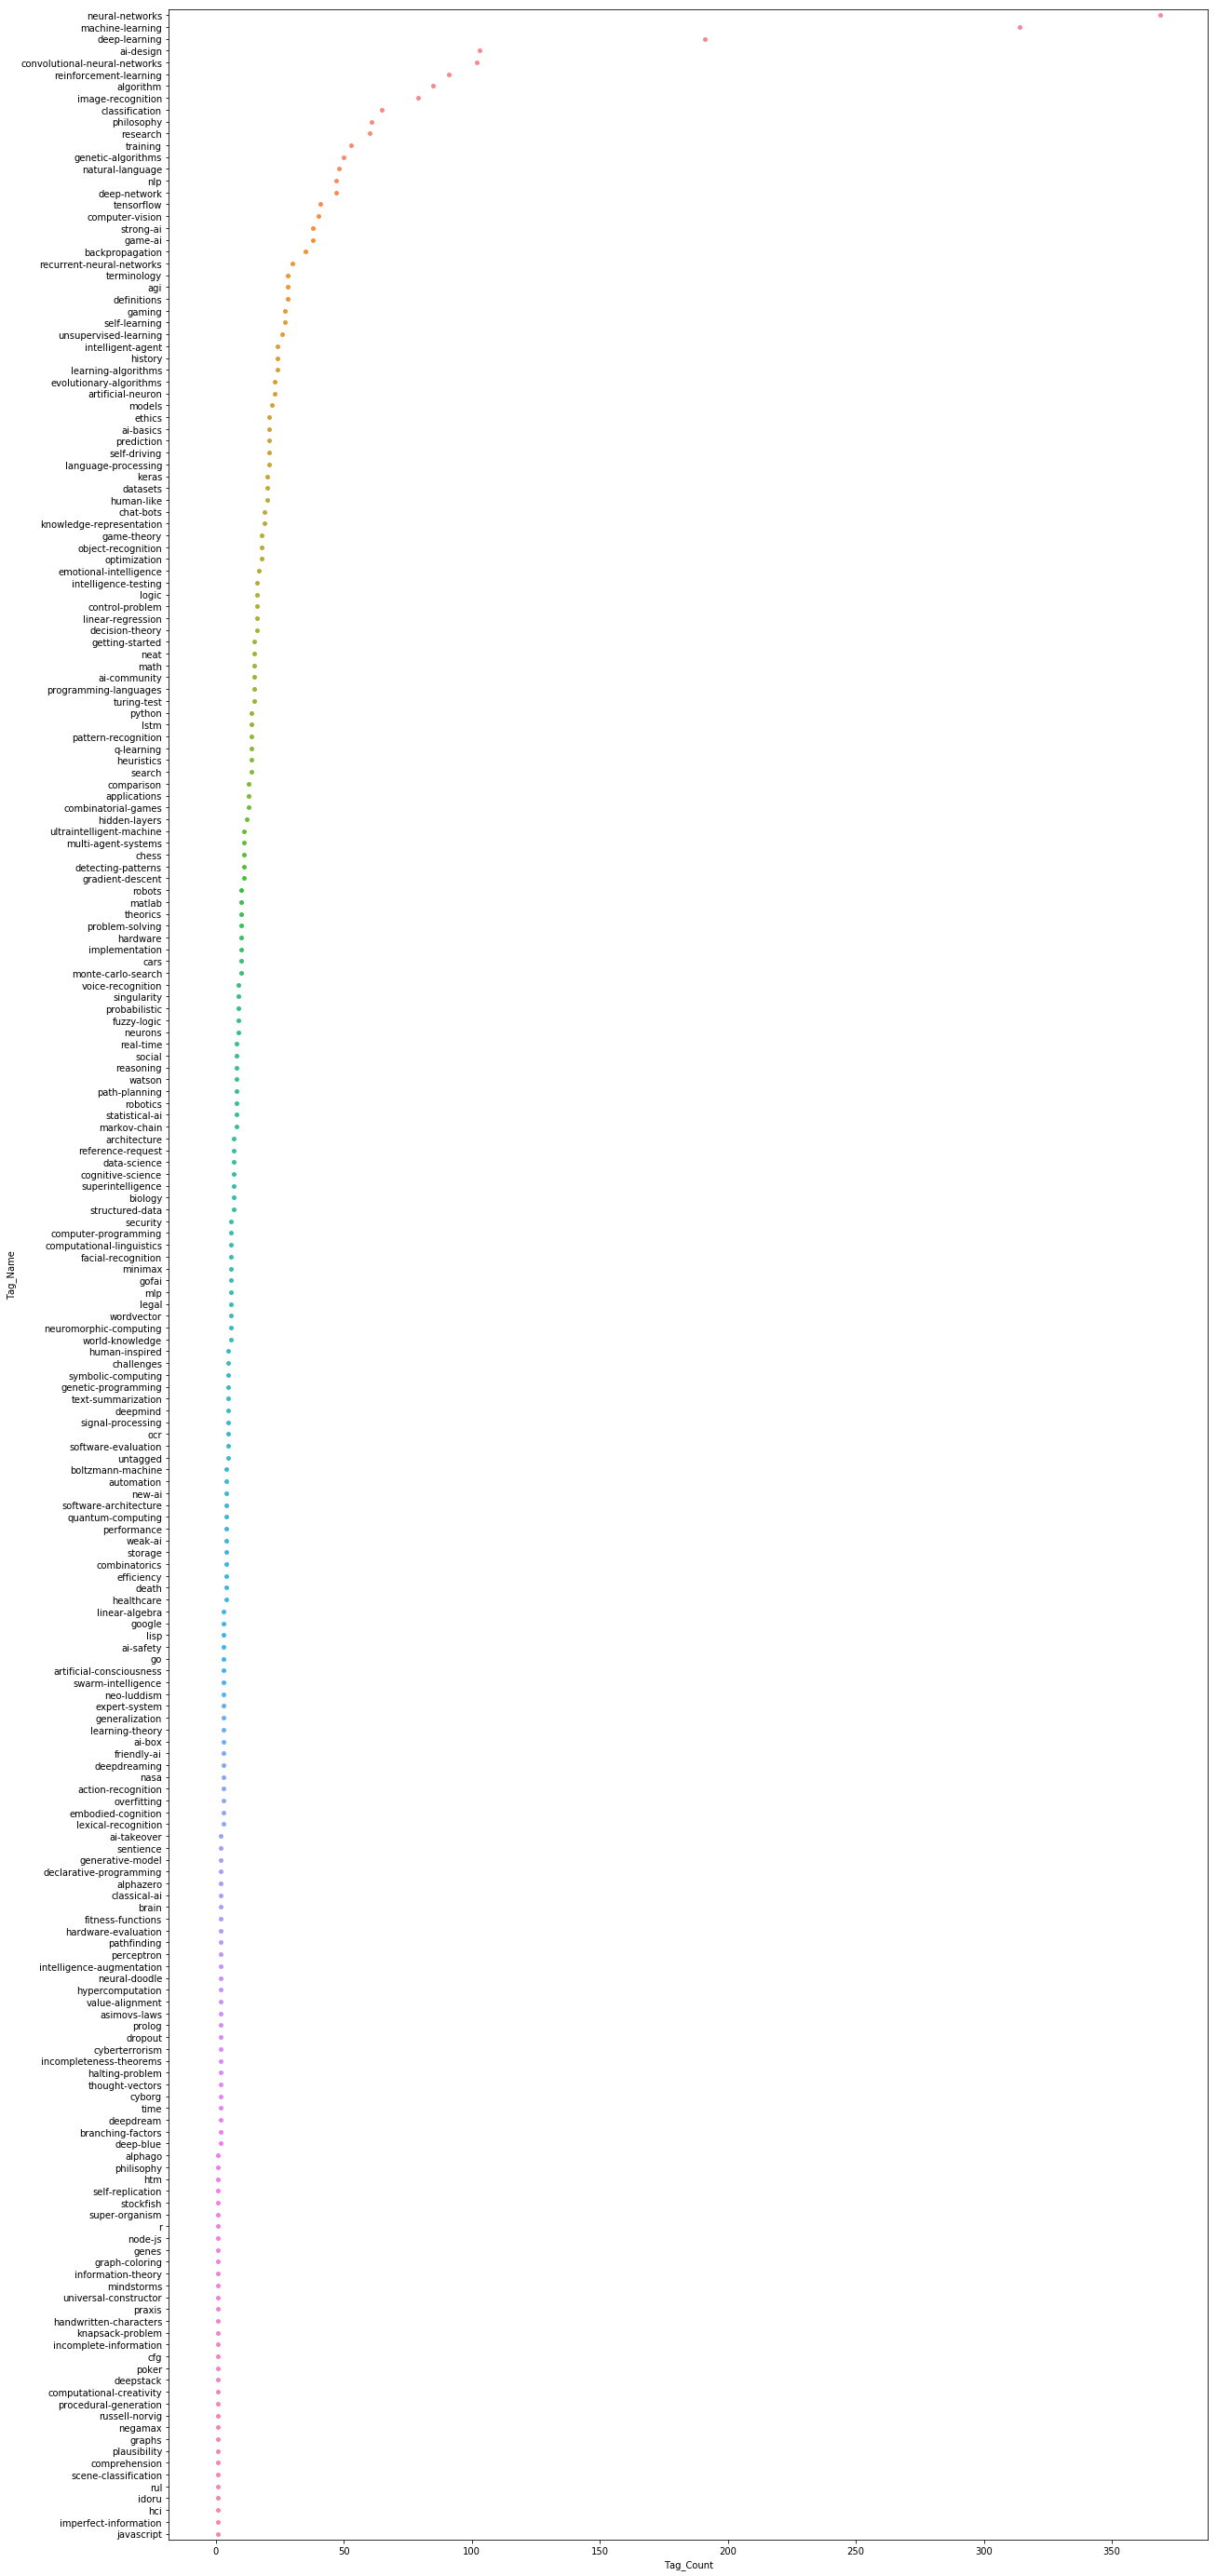

In [17]:
tags.sort_values('Tag_Count', ascending=False, inplace=True)
tags.head()
plt.subplots(figsize=(20,50))
sns.stripplot(x="Tag_Count", y="Tag_Name", data=tags[['Tag_Name','Tag_Count']])

In [19]:
users = users_data(ai_path+file['Users'])
users.head()

,Id,Creation_Date,Creation_Time,Reputation,Display_Name,Last_Access_Date,Last_Access_Time,Location,About_User,Views,Age,Up_Votes,Down_Votes,Account_Id
0,-1,2016-08-02,00:14:10.580,1,Community,2016-08-02,00:14:10.580,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",0,2,0,219,-1
1,1,2016-08-02,15:36:45.333,101,Adam Lear,2018-01-23,17:34:19.923,"New York, NY",\n\n<p>Developer at Stack Overflow. Canadian w...,37,35,0,0,37099
2,2,2016-08-02,15:36:48.397,101,Nick Craver,2016-11-30,22:09:22.300,"Winston-Salem, NC",<p>I am the Architecture Lead for Stack Overfl...,10,33,0,0,7598
3,3,2016-08-02,15:38:01.633,101,Geoff Dalgas,2018-01-09,03:22:26.573,"Corvallis, OR, United States",<p>Developer on the Stack Overflow team. Find...,11,41,0,0,2
4,4,2016-08-02,15:38:21.100,1321,Franck Dernoncourt,2018-02-20,21:50:23.650,"Adobe Research, San Jose, CA, USA","<p><a href=""https://stackexchange.com/users/16...",59,-,15,2,169656


In [21]:
# loc_freq = {}
# loc_vals = users['Location']
# gn = Nominatim()

# for ind in range(1,len(loc_vals)) :
#     try:
#         if loc_vals[ind] is not '-':
#             print(ind,loc_vals[ind])
        
#             if len(loc_vals[ind]) == 1:
#                 country = loc_vals[ind]
#             else:
#                 location = gn.geocode(loc_vals[ind].split(',')[-1])
        
#                 if location is not None:
#                     country = location.raw['display_name'].split(',')[-1]
        
#             if country not in loc_freq:
#                 loc_freq[country] = 1
#             else:
#                 loc_freq[country] += 1
#     except:
#         print('Error occured at ',ind)

# print(loc_freq)

In [38]:
votes_history = votes_history(ai_path+file['Votes'])
votes_history.head()

,Id,Creation_Date,Creation_Time,Post_Id,Vote_Type_Id
0,1,2016-08-02,00:00:00.000,1,2
1,2,2016-08-02,00:00:00.000,1,2
2,3,2016-08-02,00:00:00.000,1,2
3,4,2016-08-02,00:00:00.000,1,2
4,5,2016-08-02,00:00:00.000,1,2
